# Метод наименьших квадратов для различных функций


Метод наименьших квадратов (МНК) — это один из основных методов аппроксимации экспериментальных данных, 
используемый для нахождения зависимости между величинами. Он минимизирует сумму квадратов отклонений экспериментальных данных от 
расчетной модели.

В этом разделе мы рассмотрим:
1. Линейную аппроксимацию.
2. Полиномиальную аппроксимацию.
3. Экспоненциальную аппроксимацию.
4. Логарифмическую аппроксимацию.
5. Сравнение моделей.


## 1. Линейная аппроксимация


Линейная аппроксимация используется, когда предполагается линейная зависимость между переменными:

$$ y = kx + b $$

### Пример:


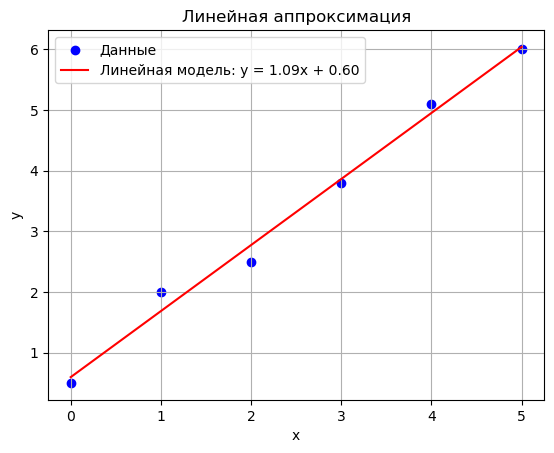

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Данные
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.5, 2.0, 2.5, 3.8, 5.1, 6.0])

# Аппроксимация методом наименьших квадратов
coeffs = np.polyfit(x, y, 1)  # Полином 1-й степени
k, b = coeffs

# Построение графика
x_fit = np.linspace(min(x), max(x), 100)
y_fit = k * x_fit + b

plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x_fit, y_fit, label=f'Линейная модель: y = {k:.2f}x + {b:.2f}', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная аппроксимация')
plt.legend()
plt.grid()
plt.show()


## 2. Полиномиальная аппроксимация


Полиномиальная аппроксимация применяется, если зависимость между переменными более сложная:

$$ y = a_n x^n + a_{n-1} x^{n-1} + ... + a_1 x + a_0 $$

### Пример (полином 2-й степени):


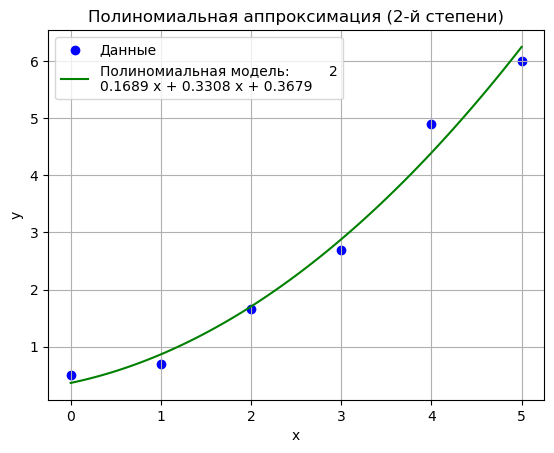

In [5]:
# Данные
x = np.array([0, 1, 2, 3, 4, 5])
y = np.array([0.5, 0.7, 1.66, 2.7, 4.9, 6.0])

# Аппроксимация полиномом 2-й степени
coeffs_poly = np.polyfit(x, y, 2)  # Полином 2-й степени
poly_model = np.poly1d(coeffs_poly)

# Построение графика
y_poly_fit = poly_model(x_fit)

plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x_fit, y_poly_fit, label=f'Полиномиальная модель: {poly_model}', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная аппроксимация (2-й степени)')
plt.legend()
plt.grid()
plt.show()


## 3. Экспоненциальная аппроксимация


Экспоненциальная зависимость имеет вид:

$$ y = a e^{bx} $$

Для нахождения коэффициентов часто используют логарифмирование:

$$ \ln(y) = \ln(a) + bx $$

### Пример:


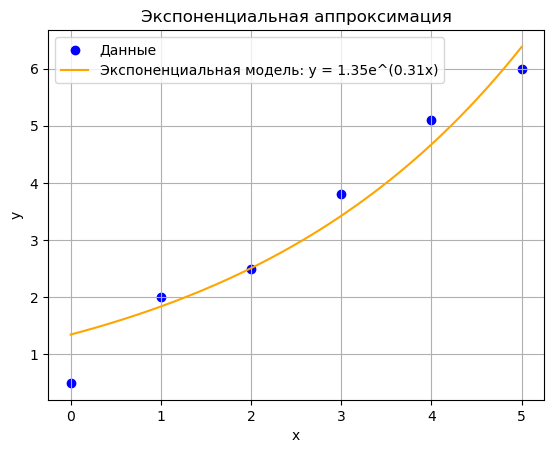

In [3]:

from scipy.optimize import curve_fit

# Определение экспоненциальной функции
def exponential(x, a, b):
    return a * np.exp(b * x)

# Аппроксимация
params, _ = curve_fit(exponential, x, y)
a, b = params

# Построение графика
y_exp_fit = exponential(x_fit, a, b)

plt.scatter(x, y, label='Данные', color='blue')
plt.plot(x_fit, y_exp_fit, label=f'Экспоненциальная модель: y = {a:.2f}e^({b:.2f}x)', color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Экспоненциальная аппроксимация')
plt.legend()
plt.grid()
plt.show()


## 4. Логарифмическая аппроксимация


Логарифмическая зависимость имеет вид:

$$ y = a \ln(x) + b $$

### Пример:


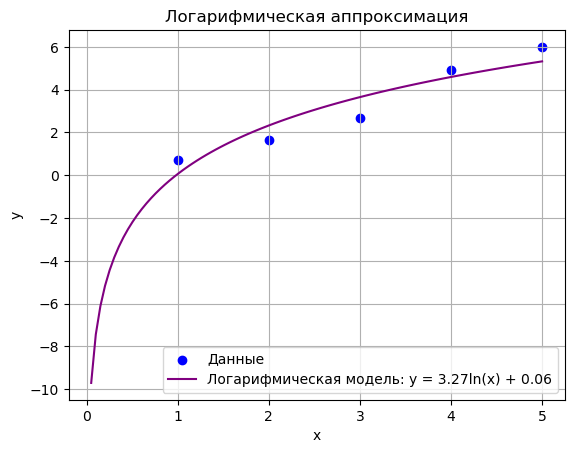

In [6]:

# Определение логарифмической функции
def logarithmic(x, a, b):
    return a * np.log(x) + b

# Убираем нулевые значения x (для логарифма)
x_nonzero = x[1:]
y_nonzero = y[1:]

# Аппроксимация
params_log, _ = curve_fit(logarithmic, x_nonzero, y_nonzero)
a_log, b_log = params_log

# Построение графика
y_log_fit = logarithmic(x_fit[1:], a_log, b_log)

plt.scatter(x_nonzero, y_nonzero, label='Данные', color='blue')
plt.plot(x_fit[1:], y_log_fit, label=f'Логарифмическая модель: y = {a_log:.2f}ln(x) + {b_log:.2f}', color='purple')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Логарифмическая аппроксимация')
plt.legend()
plt.grid()
plt.show()


## 5. Сравнение моделей


Для выбора наилучшей модели часто используют критерии, такие как среднеквадратичная ошибка (MSE).

### Пример сравнения:


In [7]:

from sklearn.metrics import mean_squared_error

# Вычисление MSE для каждой модели
mse_linear = mean_squared_error(y, k * x + b)
mse_poly = mean_squared_error(y, poly_model(x))
mse_exp = mean_squared_error(y, exponential(x, a, b))
mse_log = mean_squared_error(y_nonzero, logarithmic(x_nonzero, a_log, b_log))

print(f'Среднеквадратичная ошибка:')
print(f'Линейная модель: {mse_linear:.4f}')
print(f'Полиномиальная модель: {mse_poly:.4f}')
print(f'Экспоненциальная модель: {mse_exp:.4f}')
print(f'Логарифмическая модель: {mse_log:.4f}')


Среднеквадратичная ошибка:
Линейная модель: 0.3493
Полиномиальная модель: 0.0661
Экспоненциальная модель: 0.5750
Логарифмическая модель: 0.4628
